In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Instalar pdf2image se não estiver presente
try:
    import pdf2image
except ImportError:
    print("Instalando pdf2image...")
    %pip install pdf2image
    import pdf2image
    print("Você pode precisar instalar poppler. Em sistemas Ubuntu/Debian, use: sudo apt-get install poppler-utils")

In [26]:
# Caminho para o arquivo PDF
pdf_path = "passport_original_exact.pdf"

# Verificar se o arquivo existe
if not os.path.exists(pdf_path):
    print(f"Arquivo não encontrado: {pdf_path}")
    print("Arquivos disponíveis:", os.listdir('.'))
else:
    # Converter PDF para imagem
    try:
        # Converter a primeira página do PDF para uma imagem
        images = pdf2image.convert_from_path(pdf_path, dpi=300)
        img = np.array(images[0])  # Converter para array numpy
        
        # Converter para BGR (formato usado pelo OpenCV)
        img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        
        # Converter para escala de cinza
        gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        
        print("Conversão concluída! Use a próxima célula para visualizar as imagens.")
    except Exception as e:
        print(f"Erro ao processar o PDF: {e}")

Conversão concluída! Use a próxima célula para visualizar as imagens.


Valores de borda definidos manualmente:
Posição X: 105, Posição Y: 1055
Largura: 1890, Altura: 2340


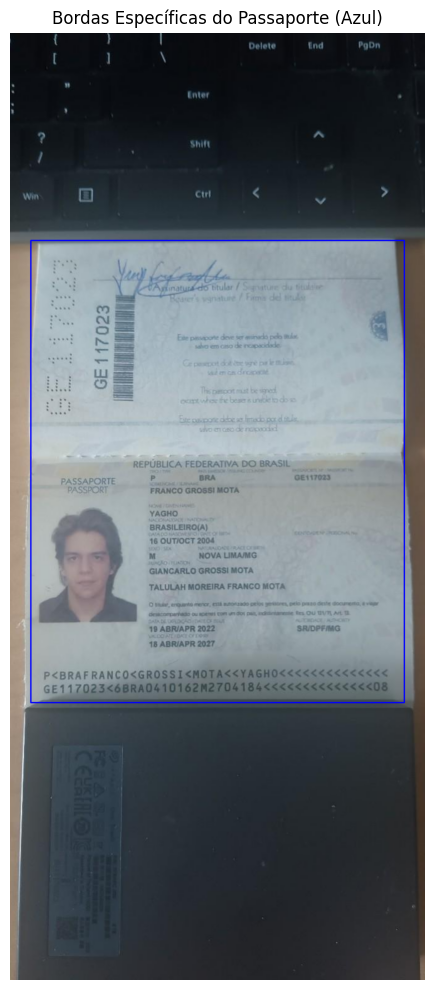

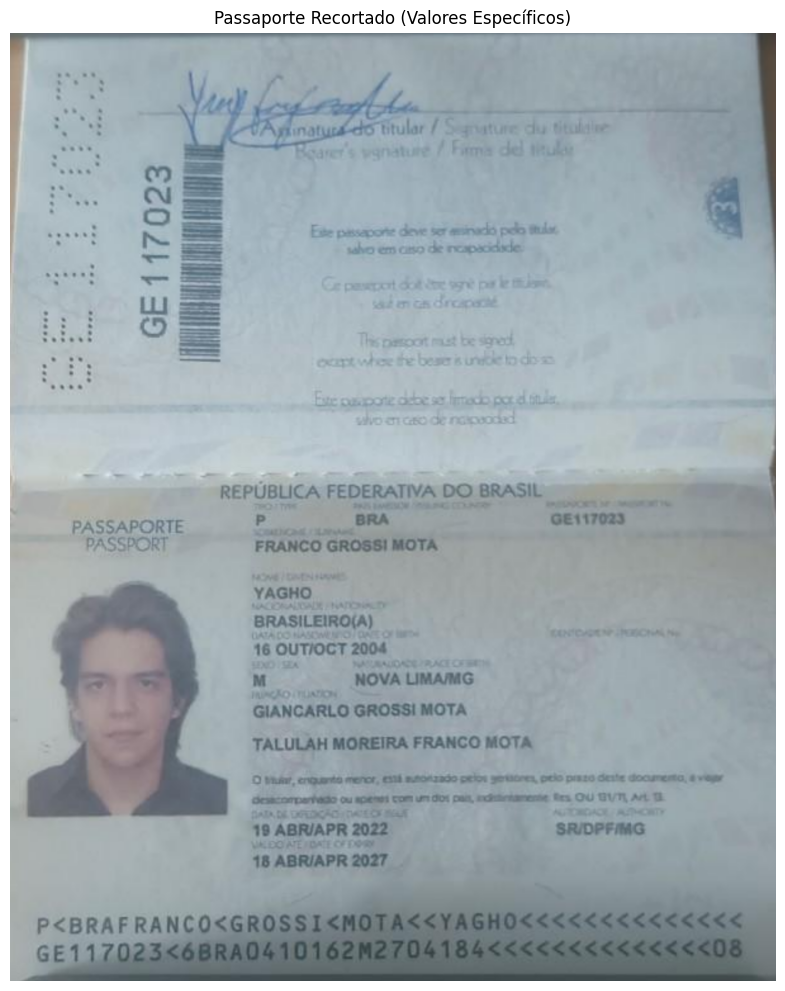

Imagem recortada salva como 'passport_cropped_manual.jpg'


In [ ]:
# Método manual com valores específicos - Ajuste os valores até obter o resultado desejado
try:
    # Criar uma cópia da imagem original
    img_display = img_bgr.copy()
    
    # Valores ESPECÍFICOS para as bordas - ALTERE CONFORME NECESSÁRIO
    # =================================================================
    border_x = 105        # Posição X do canto superior esquerdo
    border_y = 1055        # Posição Y do canto superior esquerdo
    border_width = 1890   # Largura do retângulo 
    border_height = 2340  # Altura do retângulo
    # =================================================================
    
    # Mostrar os valores configurados
    print(f"Valores de borda definidos manualmente:")
    print(f"Posição X: {border_x}, Posição Y: {border_y}")
    print(f"Largura: {border_width}, Altura: {border_height}")
    
    # Desenhar o retângulo
    cv2.rectangle(img_display, (border_x, border_y), (border_x + border_width, border_y + border_height), (255, 0, 0), 5)
    
    # Exibir resultado
    plt.figure(figsize=(12, 10))
    plt.title('Bordas Específicas do Passaporte (Azul)')
    plt.imshow(cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    # Recortar a imagem dentro das bordas
    try:
        passport_cropped = img_bgr[border_y:border_y+border_height, border_x:border_x+border_width]
        
        # Exibir a imagem recortada
        plt.figure(figsize=(8, 10))
        plt.title('Passaporte Recortado (Valores Específicos)')
        plt.imshow(cv2.cvtColor(passport_cropped, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        
        # Salvar a imagem recortada
        cv2.imwrite('passport_cropped_manual.jpg', passport_cropped)
        print("Imagem recortada salva como 'passport_cropped_manual.jpg'")
    except Exception as e:
        print(f"Erro ao recortar a imagem: {e}")
        print("Verifique se os valores não ultrapassam as dimensões da imagem original.")
except Exception as e:
    print(f"Erro no método de valores específicos: {e}")

In [48]:
# Instalar bibliotecas necessárias para a conversão para PDF
try:
    from PIL import Image
    import os
except ImportError:
    print("Instalando biblioteca Pillow...")
    %pip install pillow
    from PIL import Image
    print("Pillow instalado com sucesso.")

In [49]:
# Converter a imagem recortada para PDF
try:
    # Verificar se a imagem recortada existe
    imagem_recortada = 'passport_cropped_manual.jpg'  # Use este nome se você usou o método específico
    # alt_imagem = 'passport_cropped.jpg'              # Use este nome se você usou o método automático
    
    # Escolher a imagem que existe
    if os.path.exists(imagem_recortada):
        img_path = imagem_recortada
        output_pdf = 'passport_cropped_manual.pdf'
    # elif os.path.exists(alt_imagem):
    #     img_path = alt_imagem
    #     output_pdf = 'passport_cropped.pdf'
    else:
        raise FileNotFoundError("Nenhuma imagem recortada encontrada. Execute as células de recorte primeiro.")
    
    # Abrir a imagem com Pillow
    img = Image.open(img_path)
    
    # Converter para RGB (necessário para PDF)
    if img.mode != 'RGB':
        img = img.convert('RGB')
    
    # Salvar como PDF
    img.save(output_pdf, "PDF", resolution=100.0)
    
    print(f"Imagem convertida com sucesso para PDF: {output_pdf}")
    print(f"Localização do arquivo: {os.path.abspath(output_pdf)}")
except Exception as e:
    print(f"Erro ao converter para PDF: {e}")

Imagem convertida com sucesso para PDF: passport_cropped_manual.pdf
Localização do arquivo: /home/yagho/python/random/passport_cropped_manual.pdf


In [50]:
# Converter para PDF com melhor qualidade e opções adicionais
try:
    from reportlab.lib.pagesizes import letter, A4
    from reportlab.pdfgen import canvas
    import io
except ImportError:
    print("Instalando biblioteca ReportLab para PDFs de alta qualidade...")
    %pip install reportlab
    from reportlab.lib.pagesizes import letter, A4
    from reportlab.pdfgen import canvas
    import io
    print("ReportLab instalado com sucesso.")

try:
    # Definir o caminho da imagem
    imagem_recortada = 'passport_cropped_manual.jpg'  # Use este nome se você usou o método específico
    # alt_imagem = 'passport_cropped.jpg'              # Use este nome se você usou o método automático
    
    # Escolher a imagem que existe
    if os.path.exists(imagem_recortada):
        img_path = imagem_recortada
        output_pdf = 'passport_hq.pdf'
    # elif os.path.exists(alt_imagem):
    #     img_path = alt_imagem
    #     output_pdf = 'passport_hq.pdf'
    else:
        raise FileNotFoundError("Nenhuma imagem recortada encontrada. Execute as células de recorte primeiro.")
    
    # Abrir a imagem com Pillow
    img = Image.open(img_path)
    img_width, img_height = img.size
    
    # Calcular proporção para ajustar ao tamanho A4
    # A4 = (595.276, 841.890) pontos
    a4_w, a4_h = A4
    w_ratio = a4_w / img_width
    h_ratio = a4_h / img_height
    scale = min(w_ratio, h_ratio) * 0.9  # 90% do tamanho máximo para deixar margem
    
    # Criar um PDF
    c = canvas.Canvas(output_pdf, pagesize=A4)
    
    # Calcular posição para centralizar a imagem na página
    x = (a4_w - img_width * scale) / 2
    y = (a4_h - img_height * scale) / 2
    
    # Inserir a imagem no PDF, centralizada
    c.drawImage(img_path, x, y, width=img_width*scale, height=img_height*scale)
    
    # Finalizar o PDF
    c.save()
    
    print(f"PDF de alta qualidade criado: {output_pdf}")
    print(f"Localização do arquivo: {os.path.abspath(output_pdf)}")
except Exception as e:
    print(f"Erro ao criar PDF de alta qualidade: {e}")

PDF de alta qualidade criado: passport_hq.pdf
Localização do arquivo: /home/yagho/python/random/passport_hq.pdf
